
# Economic Resilience Predictor
## Phase 2: Exploratory Data Analysis (EDA)

**Project Overview:**
- **Objective**: Understand patterns in economic resilience across 38 countries
- **Dataset**: 1,292 observations with 78 engineered features 
- **Scope**: Multi-dimensional analysis of economic resilience factors

**EDA Goals:**
1. **Data Quality Assessment**: Comprehensive profiling and validation
2. **Univariate Analysis**: Distribution patterns and statistical properties
3. **Bivariate Analysis**: Feature relationships and correlations
4. **Multivariate Analysis**: Complex interactions and patterns
5. **Business Insights**: Economic resilience drivers and policy implications

In [25]:
# Load the corrected engineered features dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path
import os


In [26]:
# DATA LOADING SOLUTION
# =============================================================================


def load_engineered_dataset():
    """
    Robust loading function that tries multiple common locations.
    
    Returns:
        DataFrame: The engineered features dataset
    """
    # List of possible file locations (add your specific paths)
    possible_paths = [
        # Your specific path
        '/Users/laurarojas/Documents/DataScience/DS_CapstoneProjects/modern_economic_resilience/data/engineered_features_dataset.csv',
        
        # Common relative paths
        'data/engineered_features_dataset.csv',
        './data/engineered_features_dataset.csv',
        '../data/engineered_features_dataset.csv',
        'engineered_features_dataset.csv',
        './engineered_features_dataset.csv',
        
        # Alternative names in case of variations
        'data/engineered_dataset.csv',
        'engineered_dataset.csv'
    ]
    
    print("SEARCHING FOR ENGINEERED DATASET...")
    
    # Try each path
    for path in possible_paths:
        try:
            if os.path.exists(path):
                print(f"  Found dataset at: {path}")
                df = pd.read_csv(path)
                
                # Validate the dataset
                print(f"   Dataset loaded successfully:")
                print(f"   Shape: {df.shape}")
                print(f"   Columns: {df.shape[1]}")
                
                # Check for our target variable
                if 'growth_stability_target' in df.columns:
                    print(f"  Target variable 'growth_stability_target' found!")
                    target_stats = df['growth_stability_target'].describe()
                    print(f"   Range: {target_stats['min']:.3f} - {target_stats['max']:.3f}")
                    print(f"   Mean: {target_stats['mean']:.3f}")
                else:
                    print(f"⚠️  Target variable 'growth_stability_target' not found")
                    print(f"   Available targets: {[col for col in df.columns if 'target' in col]}")
                
                return df
                
        except Exception as e:
            print(f"Failed to load from {path}: {e}")
            continue
    
    # If no file found, provide helpful guidance
    print(f"\n DATASET NOT FOUND IN ANY EXPECTED LOCATION")
    print(f"   MANUAL LOADING INSTRUCTIONS:")
    print(f"   1. Check your current working directory: {os.getcwd()}")
    print(f"   2. List files in current directory:")
    
    # List CSV files in current directory
    current_dir = Path('.')
    csv_files = list(current_dir.glob('*.csv'))
    if csv_files:
        print(f"      CSV files found:")
        for csv_file in csv_files:
            print(f"        • {csv_file}")
    else:
        print(f"      No CSV files in current directory")
    
    print(f"\n   3. Update the path below with your actual file location:")
    print(f"      df = pd.read_csv('YOUR_ACTUAL_PATH_HERE')")
    
    # Return None so user knows to fix the path
    return None

In [27]:
# Loading 

df = load_engineered_dataset()  # or load_data_simple() if path needs updating

if df is None:
    raise Exception("Data loading failed. Please update file path in loading function.")

print(f"\nData loaded successfully: {df.shape}")

SEARCHING FOR ENGINEERED DATASET...
  Found dataset at: /Users/laurarojas/Documents/DataScience/DS_CapstoneProjects/modern_economic_resilience/data/engineered_features_dataset.csv
   Dataset loaded successfully:
   Shape: (1292, 78)
   Columns: 78
  Target variable 'growth_stability_target' found!
   Range: 0.005 - 72.771
   Mean: 4.627

Data loaded successfully: (1292, 78)


In [28]:
# Immediate validation
print(f"Dataset shape: {df.shape}")
print(f"Target variable range: {df['growth_stability_target'].describe()}")
print(f"Missing data summary:\n{df.isnull().sum().sort_values(ascending=False).head(10)}")
print(f"Time coverage: {df['year'].min()}-{df['year'].max()}")
print(f"Countries: {df['country_code'].nunique()}")

Dataset shape: (1292, 78)
Target variable range: count    1252.000000
mean        4.627188
std         7.172807
min         0.005410
25%         0.851283
50%         2.472390
75%         5.409891
max        72.770775
Name: growth_stability_target, dtype: float64
Missing data summary:
domestic_credit_private_gdp      1036
private_investment_gdp           1035
government_debt_gdp               736
bank_capital_assets_ratio         711
real_interest_rate                555
tertiary_education_enrollment     469
market_cap_gdp                    438
research_development_gdp          398
tariff_rate_applied_weighted      284
fiscal_capacity                   213
dtype: int64
Time coverage: 1990-2023
Countries: 38


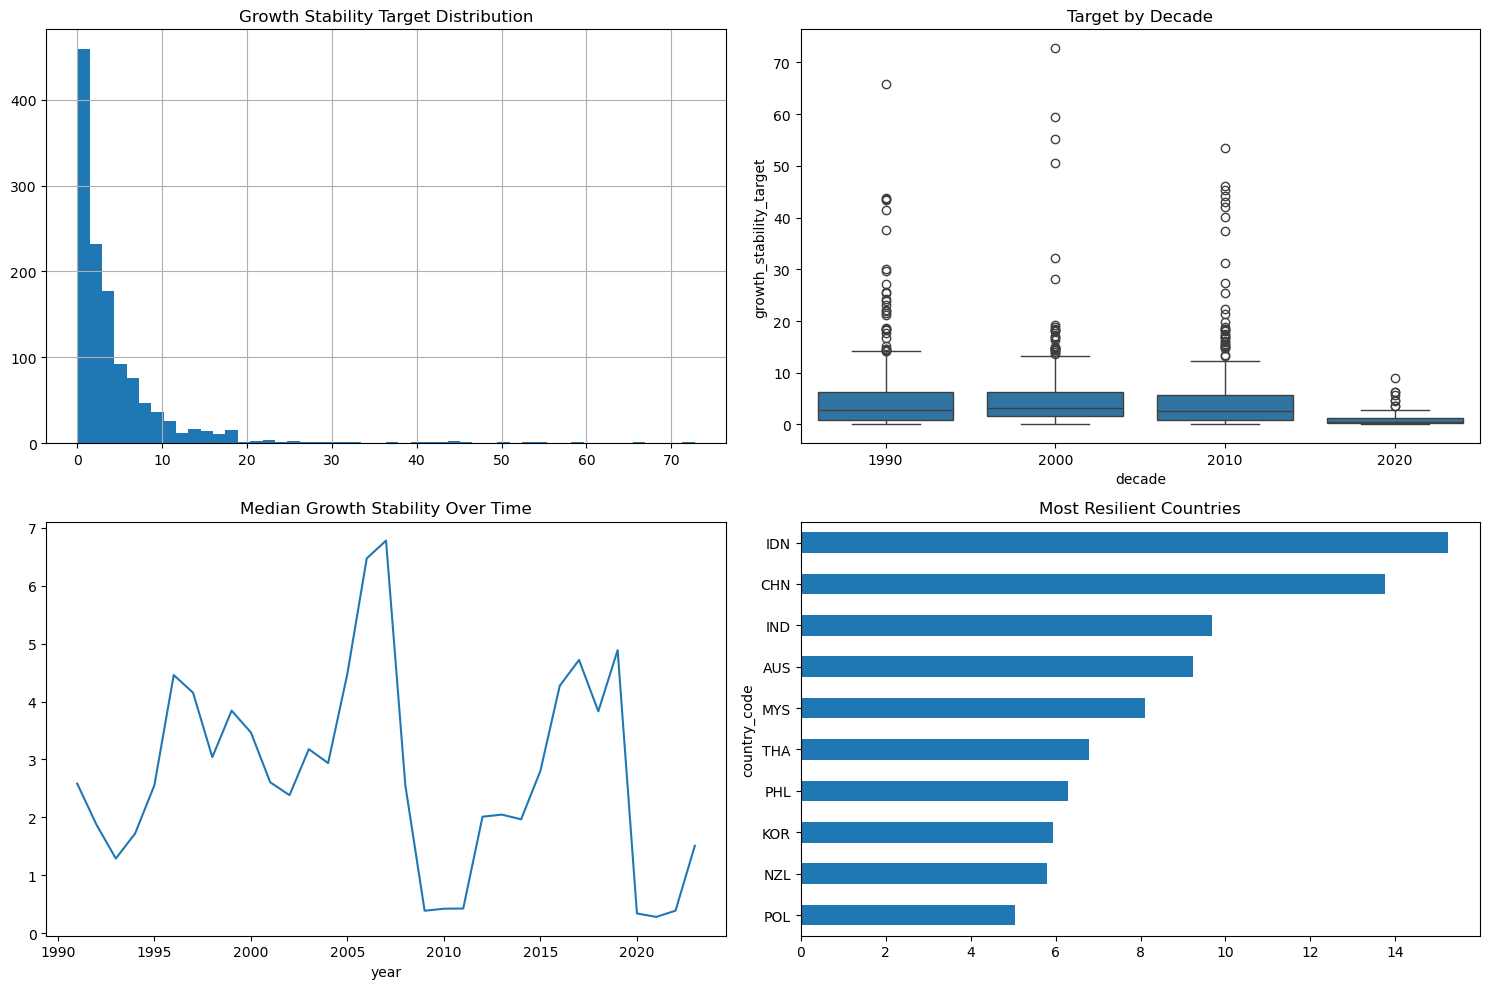

In [29]:
# Primary target analysis
target = 'growth_stability_target'

# Distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
df[target].hist(bins=50, ax=axes[0,0])
axes[0,0].set_title('Growth Stability Target Distribution')

# Box plot by decade
df['decade'] = (df['year'] // 10) * 10
sns.boxplot(data=df, x='decade', y=target, ax=axes[0,1])
axes[0,1].set_title('Target by Decade')

# Time series plot (median by year)
yearly_median = df.groupby('year')[target].median()
yearly_median.plot(ax=axes[1,0])
axes[1,0].set_title('Median Growth Stability Over Time')

# Country comparison (top/bottom performers)
country_avg = df.groupby('country_code')[target].mean().sort_values()
country_avg.tail(10).plot(kind='barh', ax=axes[1,1])
axes[1,1].set_title('Most Resilient Countries')

plt.tight_layout()
plt.show()

Resilience during different periods:
                             mean       std  count
shock_period                                      
COVID-19                 0.548198  0.713461    114
Global Financial Crisis  2.132604  2.488457     76
European Debt Crisis     2.824678  5.153704    152
Dotcom Crash             3.434358  3.319851     76
Asian Crisis             5.425672  7.423496    114
Normal                   5.916358  8.216090    720


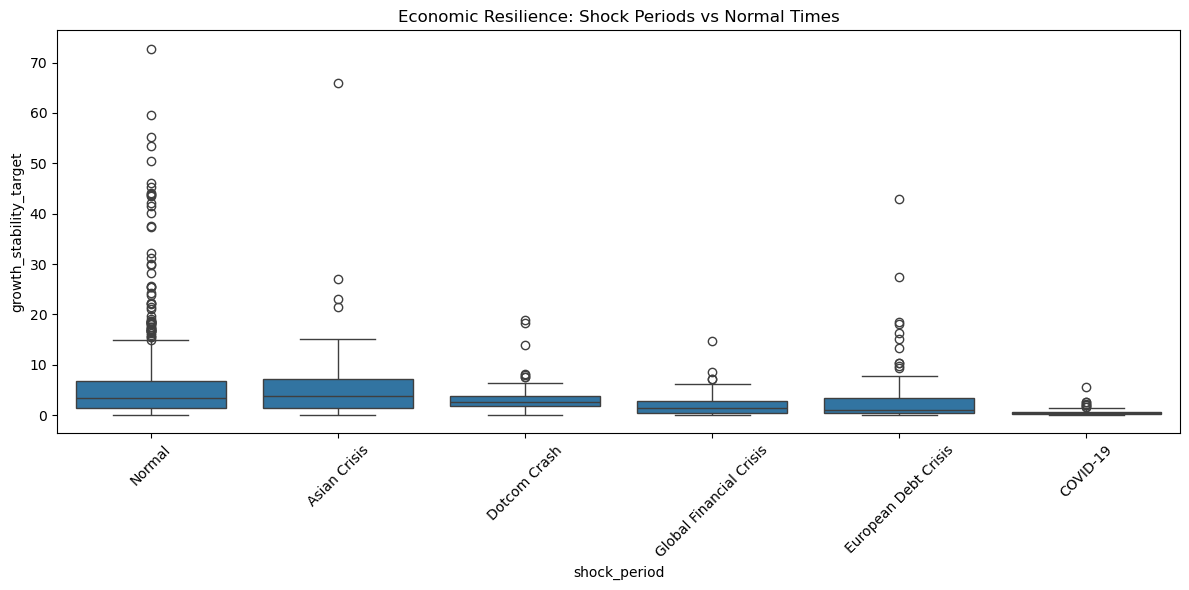

In [30]:
# Define shock periods
SHOCK_PERIODS = {
    'Asian Crisis': (1997, 1999),
    'Dotcom Crash': (2001, 2002), 
    'Global Financial Crisis': (2008, 2010),
    'European Debt Crisis': (2010, 2013),
    'COVID-19': (2020, 2022)
}

# Create shock indicator
df['shock_period'] = 'Normal'
for shock_name, (start, end) in SHOCK_PERIODS.items():
    mask = (df['year'] >= start) & (df['year'] <= end)
    df.loc[mask, 'shock_period'] = shock_name

# Shock vs normal comparison
shock_comparison = df.groupby('shock_period')[target].agg(['mean', 'std', 'count'])
print("Resilience during different periods:")
print(shock_comparison.sort_values('mean'))

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='shock_period', y=target)
plt.xticks(rotation=45)
plt.title('Economic Resilience: Shock Periods vs Normal Times')
plt.tight_layout()
plt.show()



In [31]:
# Calculate shock impact
shock_stats = df.groupby('shock_period')[target].agg(['mean', 'std', 'count', 'min', 'max'])
shock_stats = shock_stats.sort_values('mean')
    
print(" STABILITY BY PERIOD (Lower = More Volatile):")
print("-" * 60)
for period in shock_stats.index:
        stats = shock_stats.loc[period]
        print(f"{period:25s} | Mean: {stats['mean']:6.3f} | Std: {stats['std']:6.3f} | N: {stats['count']:3.0f}")
    

 STABILITY BY PERIOD (Lower = More Volatile):
------------------------------------------------------------
COVID-19                  | Mean:  0.548 | Std:  0.713 | N: 114
Global Financial Crisis   | Mean:  2.133 | Std:  2.488 | N:  76
European Debt Crisis      | Mean:  2.825 | Std:  5.154 | N: 152
Dotcom Crash              | Mean:  3.434 | Std:  3.320 | N:  76
Asian Crisis              | Mean:  5.426 | Std:  7.423 | N: 114
Normal                    | Mean:  5.916 | Std:  8.216 | N: 720


In [32]:
# Country-specific shock analysis
print(f"\n MOST AFFECTED COUNTRIES BY SHOCK:")
for shock_name, (start, end) in SHOCK_PERIODS.items():
        shock_data = df[(df['year'] >= start) & (df['year'] <= end)]
        if len(shock_data) > 10:  # Ensure sufficient data
            country_impact = shock_data.groupby('country_code')[target].mean().sort_values()
            print(f"\n   {shock_name}:")
            print(f"      Most affected: {dict(list(country_impact.head().items()))}")
            print(f"      Least affected: {dict(list(country_impact.tail().items())[::-1])}")


 MOST AFFECTED COUNTRIES BY SHOCK:

   Asian Crisis:
      Most affected: {'THA': 0.4868660209007393, 'CZE': 0.5917265808520599, 'RUS': 0.6386499898875738, 'JPN': 1.0543036988033647, 'COL': 1.4769683865340093}
      Least affected: {'AUS': 28.33497196961456, 'USA': 13.10442627638315, 'DNK': 12.059595938834102, 'CHN': 10.896090226739993, 'TUR': 9.991569656083147}

   Dotcom Crash:
      Most affected: {'TUR': 0.2806548118692379, 'JPN': 0.7956023099368976, 'MEX': 0.8258909584063227, 'MYS': 1.4455551721638167, 'ARG': 1.5593874216621493}
      Least affected: {'CHN': 18.55354261091271, 'HUN': 10.18383411851797, 'PHL': 6.168557972808481, 'ESP': 5.853302442270071, 'THA': 5.819340795046827}

   Global Financial Crisis:
      Most affected: {'SWE': 0.41293533233763274, 'JPN': 0.42974688752536916, 'NZL': 0.46427143178130303, 'USA': 0.5240619523118942, 'IRL': 0.5274461839122991}
      Least affected: {'IDN': 9.706574863355305, 'CHN': 9.064474382937462, 'AUS': 4.673992763006682, 'POL': 4.1448134

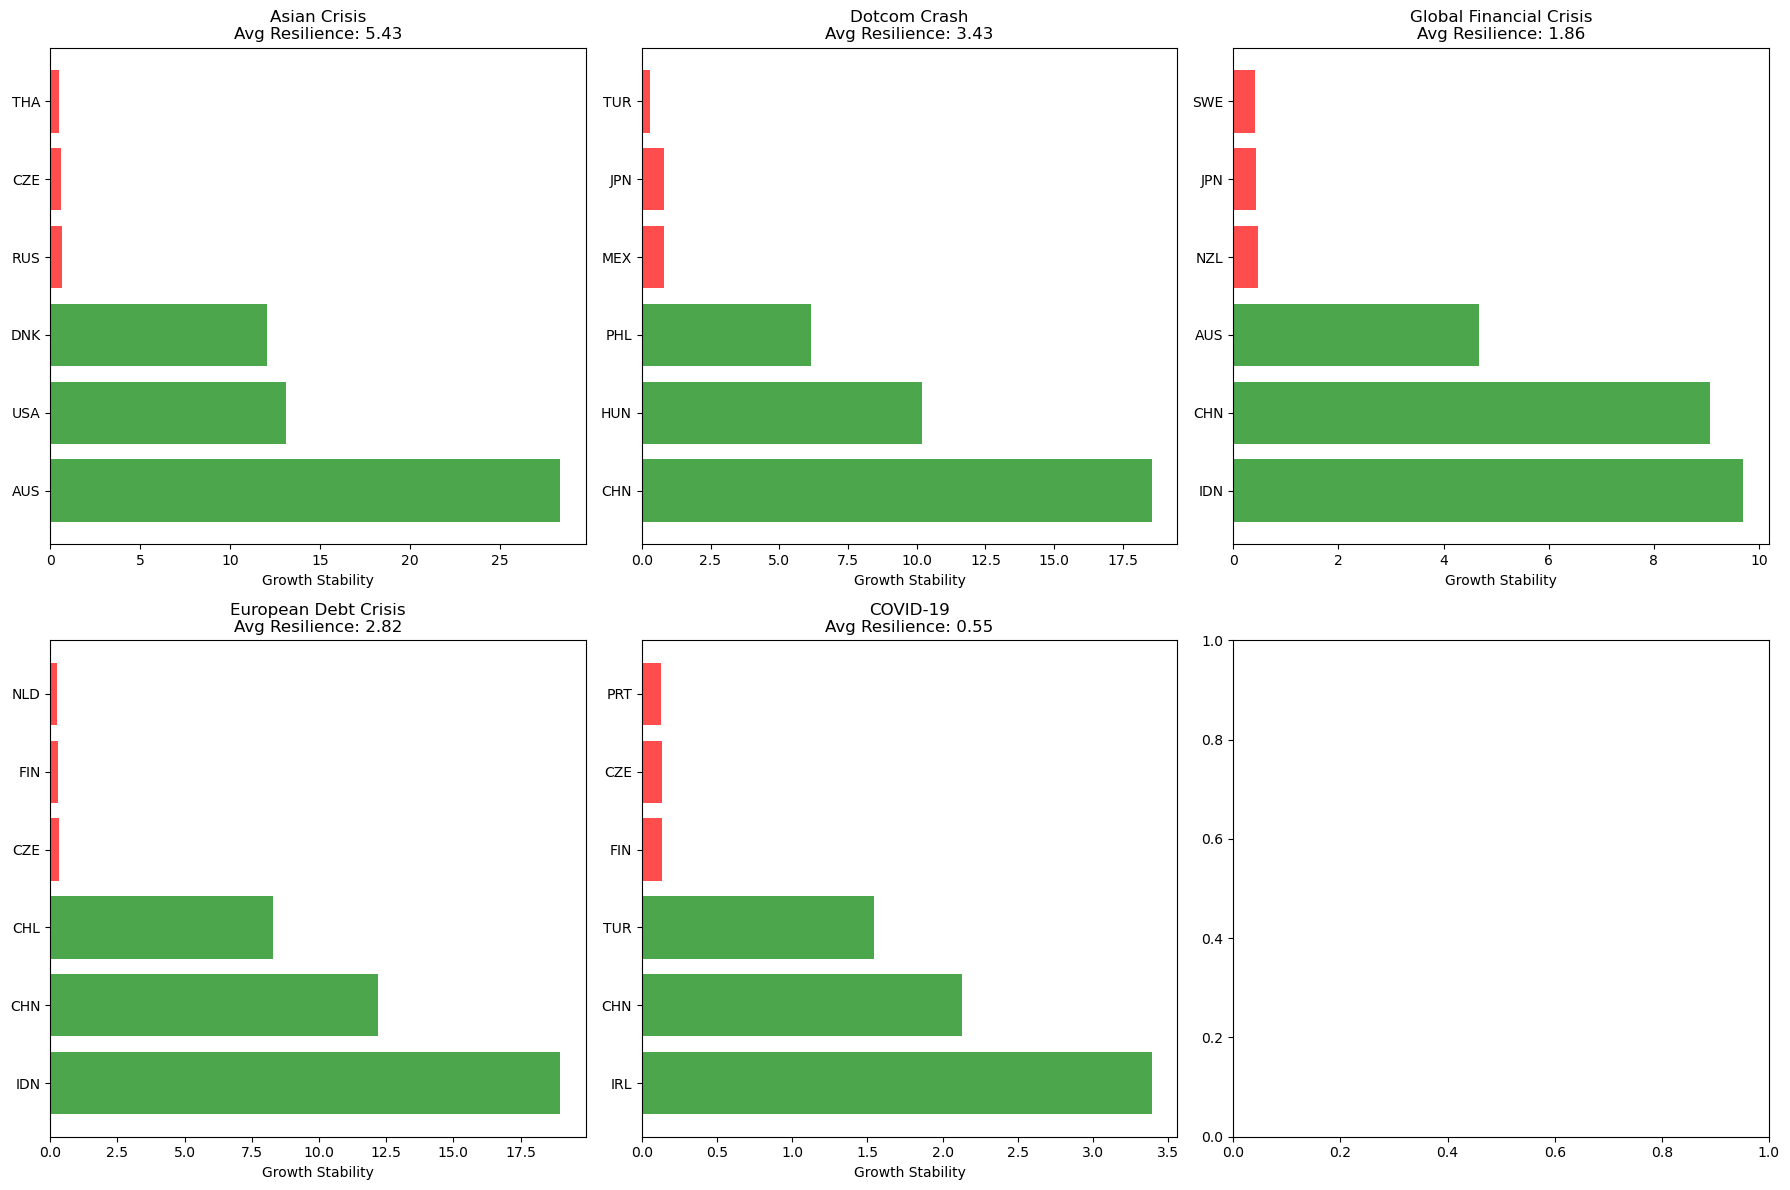

 SHOCK-SPECIFIC RESILIENCE LEADERS

 Asian Crisis:
   Best: ['AUS', 'USA', 'DNK']
   Worst: ['RUS', 'CZE', 'THA']

 Dotcom Crash:
   Best: ['CHN', 'HUN', 'PHL']
   Worst: ['MEX', 'JPN', 'TUR']

 Global Financial Crisis:
   Best: ['IDN', 'CHN', 'AUS']
   Worst: ['NZL', 'JPN', 'SWE']

 European Debt Crisis:
   Best: ['IDN', 'CHN', 'CHL']
   Worst: ['CZE', 'FIN', 'NLD']

 COVID-19:
   Best: ['IRL', 'CHN', 'TUR']
   Worst: ['FIN', 'CZE', 'PRT']


In [33]:
# Deep dive into each shock period


def analyze_shock_resilience():
    results = {}
    
    for shock_name, (start, end) in SHOCK_PERIODS.items():
        shock_data = df[(df['year'] >= start) & (df['year'] <= end)]
        
        if len(shock_data) > 0:
            # Country performance during shock
            country_performance = shock_data.groupby('country_code')['growth_stability_target'].mean().sort_values(ascending=False)
            
            # Feature patterns during shock
            shock_features = shock_data[top_features].mean()
            
            results[shock_name] = {
                'best_performers': country_performance.head(3).to_dict(),
                'worst_performers': country_performance.tail(3).to_dict(),
                'avg_resilience': shock_data['growth_stability_target'].mean(),
                'feature_patterns': shock_features.to_dict()
            }
    
    return results

shock_analysis = analyze_shock_resilience()

# Create visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (shock, data) in enumerate(shock_analysis.items()):
    if i < len(axes):
        # Plot country performance
        countries = list(data['best_performers'].keys()) + list(data['worst_performers'].keys())
        performance = list(data['best_performers'].values()) + list(data['worst_performers'].values())
        colors = ['green'] * 3 + ['red'] * 3
        
        axes[i].barh(countries, performance, color=colors, alpha=0.7)
        axes[i].set_title(f'{shock}\nAvg Resilience: {data["avg_resilience"]:.2f}')
        axes[i].set_xlabel('Growth Stability')

plt.tight_layout()
plt.show()

print(" SHOCK-SPECIFIC RESILIENCE LEADERS")
print("=" * 50)
for shock, data in shock_analysis.items():
    print(f"\n {shock}:")
    print(f"   Best: {list(data['best_performers'].keys())}")
    print(f"   Worst: {list(data['worst_performers'].keys())}")

In [34]:
# Deep dive into our top features for business insights

import matplotlib.pyplot as plt
import seaborn as sns

# Top 20 features from my model
top_features = [
    'gdp_growth_annual_stability_3y', 'gdp_per_capita_growth_volatility_3y',
    'gdp_growth_annual_momentum', 'unemployment_total_lag2',
    'gross_investment_gdp_acceleration', 'trade_gdp_trend_5y',
    'tariff_rate_applied_weighted', 'historical_vulnerability_score',
    'historical_resilience_score', 'convergence_gap'
]

# Business categorization of important features
business_categories = {
    'Stability_Measures': ['gdp_growth_annual_stability_3y', 'gdp_per_capita_growth_volatility_3y'],
    'Economic_Momentum': ['gdp_growth_annual_momentum', 'gross_investment_gdp_acceleration'],
    'Trade_Policy': ['tariff_rate_applied_weighted', 'trade_gdp_trend_5y'],
    'Labor_Markets': ['unemployment_total_lag2'],
    'Historical_Learning': ['historical_vulnerability_score', 'historical_resilience_score'],
    'Development_Gap': ['convergence_gap']
}

# Policy actionability analysis
actionable_features = {
    'High_Control': ['tariff_rate_applied_weighted', 'government_expenditure_gdp'],
    'Medium_Control': ['gross_investment_gdp', 'research_development_gdp'],
    'Low_Control': ['gdp_growth_annual_stability_3y', 'trade_gdp_trend_5y'],
    'Monitoring_Only': ['historical_vulnerability_score', 'unemployment_total_lag2']
}

print("BUSINESS-CRITICAL FEATURE INSIGHTS")
print("=" * 50)

for category, features in business_categories.items():
    available = [f for f in features if f in df.columns]
    if available:
        avg_corr = df[available + ['growth_stability_target']].corr()['growth_stability_target'][available].abs().mean()
        print(f"\n📊 {category}:")
        print(f"   Average correlation: {avg_corr:.3f}")
        for feature in available:
            corr = df[[feature, 'growth_stability_target']].corr().iloc[0,1]
            print(f"   • {feature}: {abs(corr):.3f}")

BUSINESS-CRITICAL FEATURE INSIGHTS

📊 Stability_Measures:
   Average correlation: 0.275
   • gdp_growth_annual_stability_3y: 0.143
   • gdp_per_capita_growth_volatility_3y: 0.407

📊 Economic_Momentum:
   Average correlation: 0.038
   • gdp_growth_annual_momentum: 0.016
   • gross_investment_gdp_acceleration: 0.061

📊 Trade_Policy:
   Average correlation: 0.075
   • tariff_rate_applied_weighted: 0.125
   • trade_gdp_trend_5y: 0.025

📊 Labor_Markets:
   Average correlation: 0.060
   • unemployment_total_lag2: 0.060

📊 Historical_Learning:
   Average correlation: 0.120
   • historical_vulnerability_score: 0.120
   • historical_resilience_score: 0.120

📊 Development_Gap:
   Average correlation: 0.206
   • convergence_gap: 0.206


 FEATURE CATEGORY ANALYSIS

 Economic_Fundamentals:
   Features found: 4
   Avg correlation: 0.234
   Top feature: gdp_growth_annual (0.337)

 Financial_Development:
   Features found: 3
   Avg correlation: 0.104
   Top feature: domestic_credit_private_gdp (0.134)

 Trade_Integration:
   Features found: 4
   Avg correlation: 0.057
   Top feature: exports_gdp (0.078)

 Innovation_Capacity:
   Features found: 3
   Avg correlation: 0.182
   Top feature: tertiary_education_enrollment (0.266)

 Temporal_Features:
   Features found: 12
   Avg correlation: 0.135
   Top feature: gross_investment_gdp_lag1 (0.324)

 Engineered_Targets:
   Features found: 4
   Avg correlation: 0.340
   Top feature: composite_resilience_target (0.655)

 Stability_Features:
   Features found: 2
   Avg correlation: 0.163
   Top feature: gdp_per_capita_growth_stability_3y (0.182)

 Resilience_Features: Error calculating correlations - could not convert string to float: 'Normal'


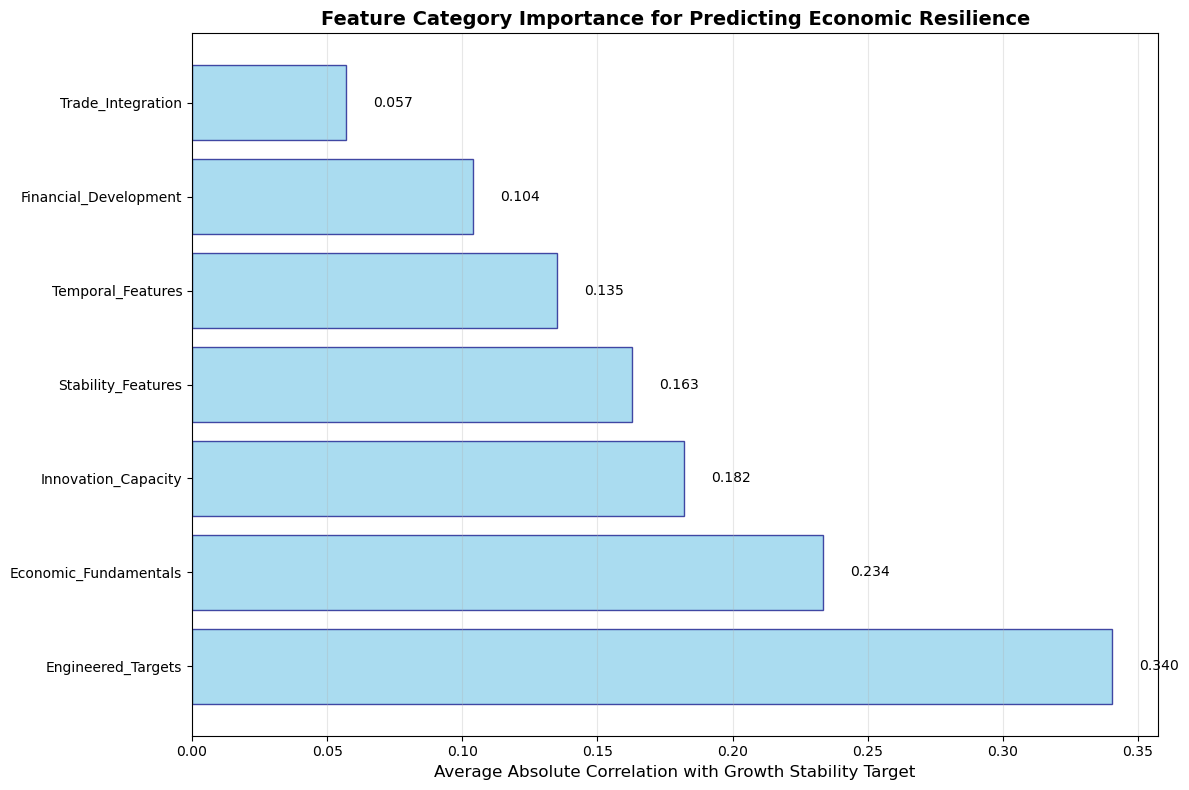


 DETAILED CORRELATION BREAKDOWN

 Engineered_Targets:
   • composite_resilience_target: 0.655
   • economic_performance_target: 0.334
   • investment_efficiency_target: 0.215

 Economic_Fundamentals:
   • gdp_growth_annual: 0.337
   • gdp_per_capita_growth: 0.311
   • population_growth: 0.167

 Innovation_Capacity:
   • tertiary_education_enrollment: 0.266
   • patent_applications_residents: 0.164
   • research_development_gdp: 0.116

 Stability_Features:
   • gdp_per_capita_growth_stability_3y: 0.182
   • gdp_growth_annual_stability_3y: 0.143

 Temporal_Features:
   • gross_investment_gdp_lag1: 0.324
   • gross_investment_gdp_lag2: 0.270
   • gross_investment_gdp_trend_5y: 0.221

 Financial_Development:
   • domestic_credit_private_gdp: 0.134
   • bank_capital_assets_ratio: 0.121
   • market_cap_gdp: 0.057

 Trade_Integration:
   • exports_gdp: 0.078
   • trade_gdp: 0.071
   • imports_gdp: 0.061

  TOP 15 FEATURES BY CORRELATION WITH TARGET
Feature Name                               

In [23]:
# Define target variable explicitly
target = 'growth_stability_target'

# Categorize features based on feature engineering pdated with actual column names
feature_categories = {
    'Economic_Fundamentals': ['gdp_growth_annual', 'gdp_per_capita_growth', 'unemployment_total', 'population_growth'],
    'Financial_Development': ['bank_capital_assets_ratio', 'domestic_credit_private_gdp', 'market_cap_gdp'],
    'Trade_Integration': ['exports_gdp', 'imports_gdp', 'trade_gdp', 'fdi_net_inflows_gdp'],
    'Innovation_Capacity': ['patent_applications_residents', 'research_development_gdp', 'tertiary_education_enrollment'],
    'Temporal_Features': [col for col in df.columns if any(x in col for x in ['lag', 'trend', 'momentum', 'acceleration'])],
    'Engineered_Targets': [col for col in df.columns if 'target' in col and col != target],
    'Stability_Features': [col for col in df.columns if 'stability' in col and col != target],
    'Resilience_Features': [col for col in df.columns if any(x in col for x in ['resilience', 'vulnerability', 'shock', 'recovery'])]
}

# Calculate correlation with target for each category (fixed version)
correlations = {}
category_details = {}

print(f" FEATURE CATEGORY ANALYSIS")
print("=" * 50)

for category, features in feature_categories.items():
    # Get features that actually exist in the dataframe
    available_features = [f for f in features if f in df.columns]
    
    if available_features:
        try:
            # Calculate correlations, handling missing values
            category_df = df[available_features + [target]].copy()
            
            # Only use rows where target is not null
            category_df = category_df.dropna(subset=[target])
            
            if len(category_df) > 10:  # Ensure enough data points
                corr_matrix = category_df.corr()[target].abs()
                valid_correlations = corr_matrix[corr_matrix.index != target].dropna()
                
                if len(valid_correlations) > 0:
                    correlations[category] = valid_correlations.mean()
                    category_details[category] = {
                        'features': available_features,
                        'correlations': valid_correlations.to_dict()
                    }
                    
                    print(f"\n {category}:")
                    print(f"   Features found: {len(available_features)}")
                    print(f"   Avg correlation: {correlations[category]:.3f}")
                    print(f"   Top feature: {valid_correlations.idxmax()} ({valid_correlations.max():.3f})")
                else:
                    print(f"\n⚠️  {category}: No valid correlations")
            else:
                print(f"\n⚠️  {category}: Insufficient data")
        except Exception as e:
            print(f"\n {category}: Error calculating correlations - {e}")
    else:
        print(f"\n {category}: No features found in dataset")

# Create visualization (only if we have correlations)

if correlations:
    plt.figure(figsize=(12, 8))
    
    # Sort categories by correlation strength
    sorted_categories = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
    categories = [cat for cat, _ in sorted_categories]
    correlation_values = [corr for _, corr in sorted_categories]
    
    # Create horizontal bar plot
    bars = plt.barh(categories, correlation_values, color='skyblue', edgecolor='navy', alpha=0.7)
    
    # Add value labels on bars
    for i, (cat, val) in enumerate(zip(categories, correlation_values)):
        plt.text(val + 0.01, i, f'{val:.3f}', va='center', fontsize=10)
    
    plt.xlabel('Average Absolute Correlation with Growth Stability Target', fontsize=12)
    plt.title('Feature Category Importance for Predicting Economic Resilience', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Detailed correlation breakdown
    print(f"\n DETAILED CORRELATION BREAKDOWN")
    print("=" * 50)
    for category in categories:
        if category in category_details:
            print(f"\n {category}:")
            details = category_details[category]
            sorted_corr = sorted(details['correlations'].items(), key=lambda x: x[1], reverse=True)
            for feature, corr in sorted_corr[:3]:  # Top 3 features per category
                print(f"   • {feature}: {corr:.3f}")
else:
    print("\n No correlations could be calculated. Check data quality.")

# Alternative: Simple correlation analysis of all features
print(f"\n  TOP 15 FEATURES BY CORRELATION WITH TARGET")
print("=" * 50)

# Calculate correlations for all numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features = [f for f in numeric_features if f != target]

try:
    all_correlations = df[numeric_features + [target]].corr()[target].abs().sort_values(ascending=False)
    all_correlations = all_correlations[all_correlations.index != target].dropna()
    
    print("Feature Name                                    | Correlation")
    print("-" * 60)
    for feature, corr in all_correlations.head(15).items():
        print(f"{feature[:45]:45s} | {corr:.3f}")
        
except Exception as e:
    print(f"Error in correlation calculation: {e}")

In [24]:
# Quick model to validate feature engineering impact

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# Prepare data
features = df.select_dtypes(include=[np.number]).columns.tolist()
features = [f for f in features if f not in ['growth_stability_target', 'year']]

X = df[features].fillna(df[features].median())
y = df['growth_stability_target'].fillna(df['growth_stability_target'].median())

# Time-aware split
train_mask = df['year'] <= 2015
test_mask = df['year'] > 2015

X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

# Quick Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

print(f"Quick Model Performance:")
print(f"Training R²: {train_score:.3f}")
print(f"Test R²: {test_score:.3f}")
print(f"Test MAE: {mean_absolute_error(y_test, rf.predict(X_test)):.3f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

Quick Model Performance:
Training R²: 0.997
Test R²: 0.994
Test MAE: 0.092

Top 10 Most Important Features:
                                feature  importance
50       gdp_growth_annual_stability_3y    0.981878
36  gdp_per_capita_growth_volatility_3y    0.002312
54           gdp_growth_annual_momentum    0.001954
31          financial_development_index    0.001630
59    gross_investment_gdp_acceleration    0.000993
44          historical_resilience_score    0.000902
53              gdp_per_capita_momentum    0.000845
45       historical_vulnerability_score    0.000610
51   gdp_per_capita_growth_stability_3y    0.000466
4                           exports_gdp    0.000426
